In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
# for reprot and visualization and find the best threshold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
with open ("../datasets/ICF/icf_level123_def.txt",'r',encoding='utf-8') as infile:
    raw_level123_def = infile.read()

level123_def = raw_level123_def.split('.')
print('num of train sentences:', len(level123_def))

num of train sentences: 320


In [3]:
df_test = pd.read_csv('../datasets/test set/full_test_sep.tsv', sep='\t')
df_icf = pd.read_csv('../datasets/ICF/ICF_def_label.tsv', sep='\t')

icf_def = df_icf['def'][:-1].tolist()
labels = df_icf['label'].tolist()
sentence = df_test['utterances'].tolist()

# transform label to num
df_test.loc[df_test['gold'] == 'learning', 'gold'] = 0
df_test.loc[df_test['gold'] == 'general', 'gold'] = 1
df_test.loc[df_test['gold'] == 'communication', 'gold'] = 2
df_test.loc[df_test['gold'] == 'mobility', 'gold'] = 3
df_test.loc[df_test['gold'] == 'selfcare', 'gold'] = 4
df_test.loc[df_test['gold'] == 'domestic', 'gold'] = 5
df_test.loc[df_test['gold'] == 'interpersonal', 'gold'] = 6
df_test.loc[df_test['gold'] == 'major', 'gold'] = 7
df_test.loc[df_test['gold'] == 'social', 'gold'] = 8
df_test.loc[df_test['gold'] == 'none', 'gold'] = 9

checklabel = [0,1,2,3,4,5,6,7,8,9]
gold = df_test['gold'].tolist()
for n,i in enumerate(gold):
    if i not in checklabel:
        if i != '-'*20:
            print(i,n)
print('clean labels')

clean labels


In [4]:
if '-'*20 in sentence:
    print('with sep processing')
    sentence = [ i for i in sentence if i != '-'*20]

if '-'*20 in gold:
    print('with sep processing')
    gold = [ i for i in gold if i != '-'*20]

with sep processing
with sep processing


In [5]:
print('num of def:', len(icf_def))
print('num of label:', len(labels))
print('num of test sentences:', len(sentence))

num of def: 9
num of label: 10
num of test sentences: 583


In [6]:
model_name = 'bert-base-uncased'
model_trained = SentenceTransformer('bert-base-uncased')

No sentence-transformers model found with name /home/alice/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/alice/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

In [7]:
sentence_emb_1 = model_trained.encode(sentence)
sentence_emb_2 = model_trained.encode(icf_def)
all_cos_score = cosine_similarity(sentence_emb_1, sentence_emb_2)
print('score dimension:', all_cos_score.shape)

score dimension: (583, 9)


In [8]:
# all_cos_score = all_cos_score.tolist()
max_cos = ["%.2f" % np.max(all_cos_score, axis = None)]
max_score_each_row = ["%.3f" % n for n in np.amax(all_cos_score, axis = 1)]
max_score_each_row = [float(n) for n in max_score_each_row]
max_score_ind = np.argmax(all_cos_score, axis =1)
print(len(max_score_each_row) == len(max_score_ind))
print('max cos:', max_cos)
print('max cos of each row:', 'total rows:', len(max_score_each_row))
print(max_score_each_row)
print('-'*20)
print('max cos index of each row:', 'total rows:', len(max_score_ind))
print(max_score_ind)
# max_score, max_score_ind

True
max cos: ['0.76']
max cos of each row: total rows: 583
[0.523, 0.539, 0.542, 0.585, 0.587, 0.56, 0.589, 0.564, 0.595, 0.538, 0.59, 0.569, 0.583, 0.532, 0.59, 0.627, 0.653, 0.575, 0.572, 0.672, 0.635, 0.636, 0.615, 0.525, 0.574, 0.576, 0.562, 0.59, 0.524, 0.545, 0.591, 0.638, 0.539, 0.587, 0.567, 0.628, 0.602, 0.606, 0.625, 0.616, 0.565, 0.54, 0.569, 0.521, 0.709, 0.573, 0.656, 0.53, 0.526, 0.635, 0.669, 0.575, 0.62, 0.564, 0.606, 0.611, 0.646, 0.556, 0.621, 0.583, 0.632, 0.628, 0.671, 0.682, 0.714, 0.734, 0.603, 0.374, 0.597, 0.617, 0.591, 0.563, 0.363, 0.521, 0.493, 0.502, 0.63, 0.576, 0.629, 0.567, 0.552, 0.653, 0.53, 0.439, 0.504, 0.608, 0.537, 0.5, 0.501, 0.536, 0.479, 0.563, 0.584, 0.564, 0.663, 0.728, 0.558, 0.638, 0.648, 0.628, 0.575, 0.545, 0.574, 0.623, 0.597, 0.605, 0.609, 0.702, 0.551, 0.614, 0.533, 0.634, 0.553, 0.64, 0.458, 0.676, 0.524, 0.536, 0.582, 0.571, 0.544, 0.541, 0.592, 0.606, 0.628, 0.579, 0.604, 0.545, 0.581, 0.642, 0.583, 0.595, 0.593, 0.622, 0.423, 0.618,

In [9]:
m = max(max_score_ind)
m # the ind list only has 0-8 which are the real category, then we put 9 as index for 'none' in the following section

8

In [10]:
zip_scor_ind = list(zip(max_score_each_row, max_score_ind))

def get_predictions(zip_scor_ind, threshold):
    """"""
    # threshold = 0.10
    predictions = []
    for s, i in zip_scor_ind:
        if s >= threshold:
            predictions.append(i)
        elif s < threshold:
            predictions.append(9) # index 9 means 'none'
        else:
            print('error comparison')
    return predictions

def get_best_fscore(thresholdlist, zip_scor_ind, gold):
    """"""
    list_fscore = []
    for threshold in thresholdlist:
        predictions = get_predictions(zip_scor_ind, threshold)
        list_fscore.append(f1_score(gold, predictions,average='macro'))
    max_fsc = max(list_fscore)
    best_thres = thresholdlist[list_fscore.index(max(list_fscore))]
    return(max_fsc, best_thres)

# predictions = get_predictions(zip_scor_ind, threshold=0.1)
thresholdlist = [0.1,0.2,0.3,0.4,0.5,0.53,0.6,0.75,0.8]
max_fsc, best_thres = get_best_fscore(thresholdlist, zip_scor_ind, gold)
print('threshold list:',thresholdlist)
print('max-macro fscore:', '%.3f' % max_fsc)
print('best threshold',best_thres)


threshold list: [0.1, 0.2, 0.3, 0.4, 0.5, 0.53, 0.6, 0.75, 0.8]
max-macro fscore: 0.296
best threshold 0.53


In [11]:
# get classification report 
# model_name = './output/tsdae-bert-base-uncased-icf-model'
print(model_name)
predictions = get_predictions(zip_scor_ind, best_thres)
confusion = confusion_matrix(gold, predictions)
report = classification_report(gold, predictions)

print(report)

bert-base-uncased
              precision    recall  f1-score   support

           0       0.13      0.30      0.18        27
           1       0.20      0.09      0.13        33
           2       0.80      0.22      0.35        18
           3       0.25      0.58      0.35        45
           4       0.21      0.45      0.28        31
           5       0.56      0.52      0.54        77
           6       0.47      0.30      0.36        67
           7       0.15      0.40      0.22        35
           8       0.29      0.07      0.11        57
           9       0.62      0.34      0.44       193

    accuracy                           0.34       583
   macro avg       0.37      0.33      0.30       583
weighted avg       0.44      0.34      0.35       583



In [12]:
for i, label in enumerate(labels):
    print(i,label)

0 learning 
1 general 
2 communication
3 mobility
4 selfcare 
5 domestic 
6 interpersonal 
7 major
8 social
9 none 


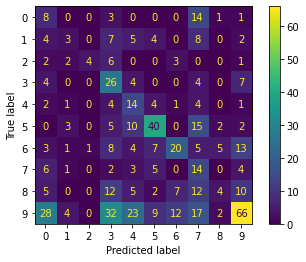

In [13]:
# plot confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=checklabel)
disp.plot()
plt.show()

In [14]:
model = model_name.split('/')[-1]
df_predictions = pd.DataFrame({
    'utterances':sentence,
    'predictions':predictions
    })
df_predictions.to_csv(f'../datasets/predictions/predictions_{model}_level_1.tsv', sep='\t',index=None)